#**This is Colaboratory is owned by:**
###1.  Kopal Sharma (J045) 
###2.  Sagarika Raje (J074)
###3. Ujwal Shah (J078)

##**Subject: Deep Learning Final Project**

##**Topic: Breast Cancer Treatment Response Classification Based Flask App**

###Models trained & tested in this colaboratory
1. Principal Componenet Analysis (PCA)
2. Logistic Regression
3. Neural Network
4. Clustering
  
  1. Hierarchical Clustering
  2. K Nearest Neighbour (KNN)
5. Support Vector Machine (SVM)



# **IMPORTING LIBRARIES AND PRE-PROCESSING**

In [ ]:
!pip install pydicom
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import cv2
import skimage.transform as st
import matplotlib.pyplot as plt
import pydicom 
from pydicom.data import get_testdata_files

     |████████████████████████████████| 1.9MB 5.8MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset = pydicom.dcmread('/content/drive/My Drive/SM 2 Project/TRAIN_NEW/NON-PCR/1-01 (1).dcm')

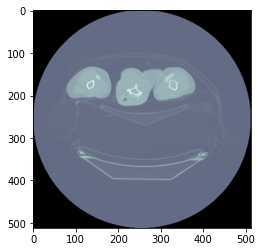

In [ ]:
# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [ ]:
dataset.pixel_array

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

In [ ]:
dataset.pixel_array.shape

(512, 512)

In [ ]:
del dataset



---



---



---



Steps for Loading Data 

1. Targeting the Respective Folder (Train or Test)
2. Passing it to "OS" to get its directory
3. Iterating it through every DICOM Image .
4. Passing it to Preprocessing
5. Saving Processed each & every image in their respective variable of Train & Test 

Preprocessing Done:
1. Checking if image is Read or Not.
2. Once the Image is Read then dividing it by 4096 to make it standardise.
3. Reshaping the Image to (512*512).

In [ ]:
#Loading TRAIN-PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TRAIN_NEW/PCR"
train_pcr_images = []
y_train_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img = np.reshape(img,(512*512))
    train_pcr_images.append(img)
    y_train_pcr.append(0) 

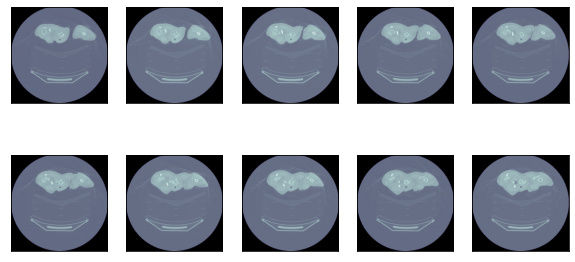

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
#Loading TRAIN-NON PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TRAIN_NEW/NON-PCR"
train_nonpcr_images = []
y_train_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    train_nonpcr_images.append(img)
    y_train_nonpcr.append(1)

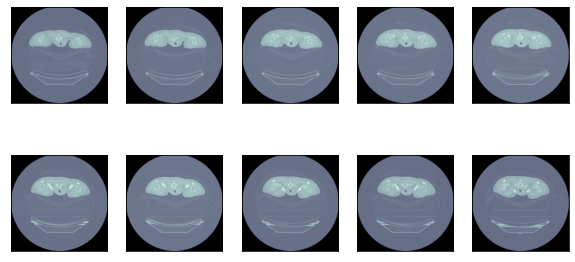

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(train_pcr_images)
print(a.shape)

b=np.array(train_nonpcr_images)
print(b.shape)

X_train=np.vstack((a, b))
print(X_train.shape)

(166, 262144)
(166, 262144)
(332, 262144)


In [ ]:
del a
del b
del img



---



---



In [ ]:
#Loading TEST-PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TEST/PCR"
test_pcr_images = []
y_test_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    test_pcr_images.append(img)
    y_test_pcr.append(0)

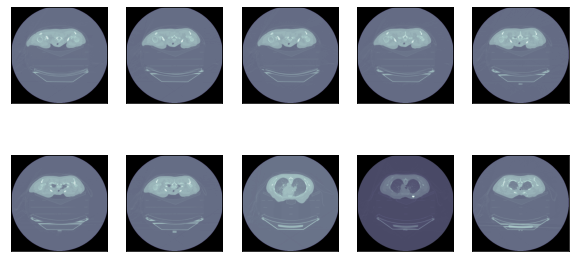

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
#Loading TEST-NON PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TEST/NON-PCR"
test_nonpcr_images = []
y_test_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    test_nonpcr_images.append(img)
    y_test_nonpcr.append(1)

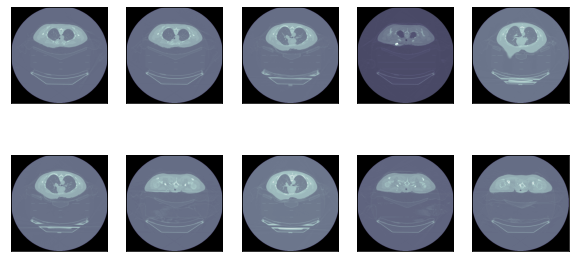

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(test_pcr_images)
print(a.shape)

b=np.array(test_nonpcr_images)
print(b.shape)

X_test=np.vstack((a, b))
print(X_test.shape)

In [ ]:
print("Total no of Train PCR images are : ",len(train_pcr_images))
print("Total no of Train NON-PCR images are : ",len(train_nonpcr_images))
print("Total no of Test PCR images are : ",len(test_pcr_images))
print("Total no of Test NON-PCR images are : ",len(test_nonpcr_images))

In [ ]:
del a 
del b
del img

In [ ]:
del train_pcr_images
del train_nonpcr_images
del test_pcr_images
del test_nonpcr_images



---



---



---



In [ ]:
#-----------------------------TRAIN---------------------------------
y_train_pcr_array=np.array(y_train_pcr)
print(y_train_pcr_array.shape)
y_train_nonpcr_array=np.array(y_train_nonpcr)
print(y_train_nonpcr_array.shape)
Y_train=np.concatenate((y_train_pcr_array,y_train_nonpcr_array))
print(Y_train.shape)
print(Y_train)

#--------------------------TEST----------------------------------------
y_test_pcr_array=np.array(y_test_pcr)
print(y_test_pcr_array.shape)
y_test_nonpcr_array=np.array(y_test_nonpcr)
print(y_test_nonpcr_array.shape)
Y_test=np.concatenate((y_test_pcr_array,y_test_nonpcr_array))
print(Y_test.shape)
print(Y_test)

(166,)
(166,)
(332,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(50,)
(50,)
(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
del y_train_pcr_array
del y_train_nonpcr_array
del y_test_pcr_array
del y_test_nonpcr_array

#**TRAINING DIFFERENT MODELS**

## **Principal Component Analysis (PCA)**

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(100)
pc=pca.fit(X_train)
sum(pca.explained_variance_ratio_[0:100])

0.9014145441755324

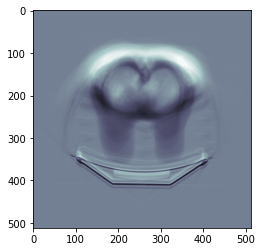

In [ ]:
plt.imshow(pc.components_[0].reshape(512,512),cmap=plt.cm.bone)

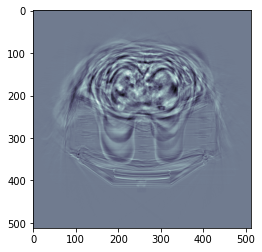

In [ ]:
plt.imshow(pc.components_[99].reshape(512,512),cmap=plt.cm.bone)

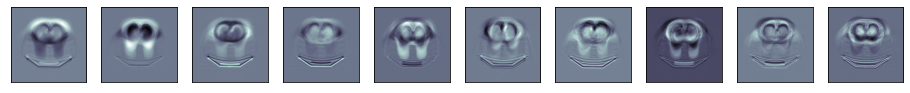

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pc.components_[i].reshape(512,512),
              cmap=plt.cm.bone)

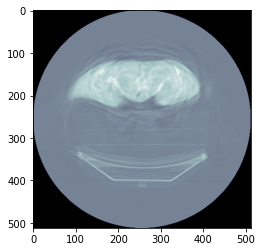

In [ ]:
projected = pc.fit_transform(X_train)
inv_proj3 = pc.inverse_transform(projected)
plt.imshow(inv_proj3[0].reshape(512,512),cmap=plt.cm.bone)

In [ ]:
projected.shape

(1494, 100)

In [ ]:
del pca
del pc
del projected
del inv_proj3

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
tic=time.clock()
lg.fit(X_train, Y_train)
toc=time.clock()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Time:",toc-tic)

Time: 128.61844399999995


In [ ]:
test_pred=lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, test_pred)

0.5542168674698795

In [ ]:
del lg
del test_pred

## **Neural Networks**

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
X_train.shape

In [ ]:
Y_train = np.reshape(Y_train, (1494,1))

In [ ]:
Y_train.shape

In [ ]:
Y_train

In [ ]:
import keras
from keras import regularizers
from keras import optimizers
initializer = keras.initializers.glorot_normal()
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "best-weights-improvement.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor ='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10, min_delta=0.01, baseline=5)

callbacks_list = [checkpoint, es]

In [ ]:
nn=models.Sequential()

nn.add(layers.Dense(128,activation='relu',input_shape=(512*512,),kernel_initializer=initializer,bias_initializer=initializer))
nn.add(layers.Dropout(0.5))
nn.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
nn.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               33554560  
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 33,554,689
Trainable params: 33,554,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tic=time.clock()
history=nn.fit(X_train,Y_train,epochs=25,callbacks=callbacks_list)
toc=time.clock()

Epoch 1/25
47/47 [==============================] - ETA: 0s - loss: 4.6026 - accuracy: 0.5234
Epoch 00001: accuracy improved from -inf to 0.52343, saving model to best-weights-improvement.hdf5
47/47 [==============================] - 11s 223ms/step - loss: 4.6026 - accuracy: 0.5234
Epoch 2/25
47/47 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5937
Epoch 00002: accuracy improved from 0.52343 to 0.59371, saving model to best-weights-improvement.hdf5
47/47 [==============================] - 10s 219ms/step - loss: 0.6863 - accuracy: 0.5937
Epoch 3/25
47/47 [==============================] - ETA: 0s - loss: 0.5969 - accuracy: 0.6620
Epoch 00003: accuracy improved from 0.59371 to 0.66198, saving model to best-weights-improvement.hdf5
47/47 [==============================] - 10s 218ms/step - loss: 0.5969 - accuracy: 0.6620
Epoch 4/25
47/47 [==============================] - ETA: 0s - loss: 0.5631 - accuracy: 0.7001
Epoch 00004: accuracy improved from 0.66198 to 0.70

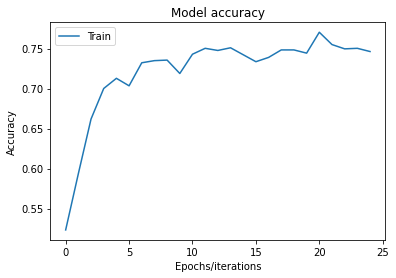

In [ ]:
#graphically representing accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train'], loc="upper left")
plt.show()

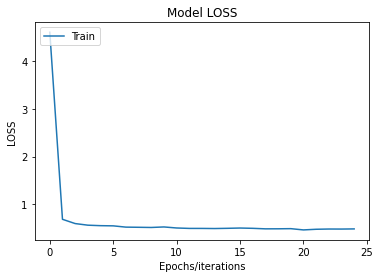

In [ ]:
#graphically representing loss

plt.plot(history.history['loss'])
plt.title("Model LOSS")
plt.ylabel("LOSS")
plt.xlabel("Epochs/iterations")
plt.legend(['Train'], loc="upper left")
plt.show()

In [ ]:
Y_test = np.reshape(Y_test, (332,1))

In [ ]:
print(X_test.shape)
print(Y_test.shape)

(332, 262144)
(332, 1)


In [ ]:
from tensorflow import keras
model_new = keras.models.load_model("best-weights-improvement.hdf5")

In [ ]:
model_new.evaluate(X_test, Y_test)
print("Time:",toc-tic)

11/11 [==============================] - 1s 46ms/step - loss: 0.7003 - accuracy: 0.5904
Time: 438.98780899999974


In [ ]:
del nn
del model_new
del history

## **Clustering**

### **Hierarchical Clustering**

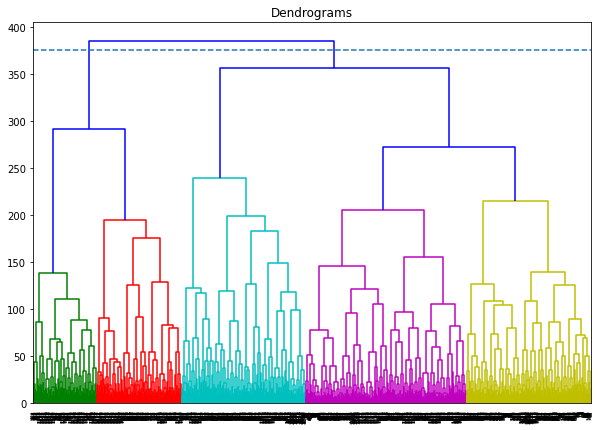

Time: 328.5225989999999


In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
tic=time.clock()
dend = shc.dendrogram(shc.linkage(X_train, method='ward',metric='euclidean'))
toc=time.clock()
plt.axhline(linestyle='--', y=375)
plt.show() 
print("Time:",toc-tic)

In [ ]:
del dend

### **K Nearest Neighbours (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2) #n is number of labels/classes

In [ ]:
tic=time.clock()
knn.fit(X_train,Y_train)
toc=time.clock()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))
print("Time:",toc-tic)

[[123  43]
 [153  13]]
              precision    recall  f1-score   support

           0       0.45      0.74      0.56       166
           1       0.23      0.08      0.12       166

    accuracy                           0.41       332
   macro avg       0.34      0.41      0.34       332
weighted avg       0.34      0.41      0.34       332

0.40963855421686746
Time: 56.56032600000003


In [ ]:
del knn
del y_pred

## **Support Vector Machine (SVM)**

In [ ]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [ ]:
svc = LinearSVC()
tic=time.clock()
svc.fit(X_train, Y_train)
tac=time.clock()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


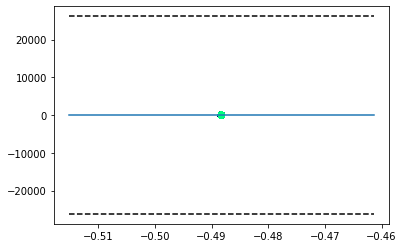

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(accuracy_score(Y_test,y_pred))
print("Time:",tac-tic)

[[ 87  79]
 [ 65 101]]
0.5662650602409639
Time: 520.7595289999999


In [ ]:
del svc
del y_pred

#**INFERENCE**
From all the above models used, it can be concluded that Neural Networks yields the best accuracy for our dataset. (accuracy of 0.8078 (80%) by the training set and 0.6416 (64%) by the test set)

Hence, we chose Neural Network as our final model for this project.



---



---



---



Thank you!